In [31]:
import keras
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import pandas as pd
import matplotlib.pyplot as plt
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
import numpy as np

In [10]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
y_test, y_train = y_test.ravel(), y_train.ravel()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000,), (10000,))

In [11]:
df = pd.DataFrame(y_train)
df[0].unique()

array([6, 9, 4, 1, 2, 7, 8, 3, 5, 0], dtype=uint8)

In [12]:
labels = [
    'airplane', 
    'automobile', 
    'bird', 
    'cat', 
    'deer', 
    'dog', 
    'frog', 
    'horse', 
    'ship', 
    'truck'
    ]

labels_dict = {i: labels[i] for i in range(10)}

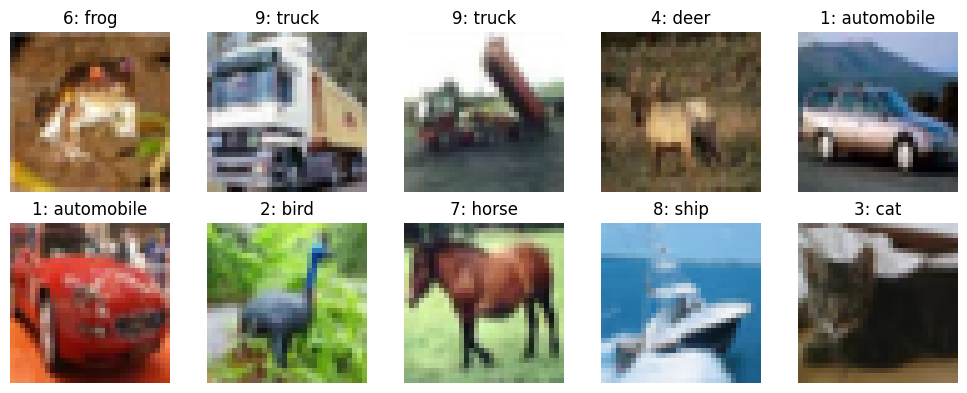

In [16]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i])
    ax.axis('off')
    ax.set_title(f"{y_train[i]}: {labels_dict[y_train[i]]}")

plt.tight_layout()

In [17]:
scaled_X_train = X_train.astype('float32') / 255
scaled_X_test = X_test.astype('float32') / 255

In [20]:
def CNN_model(learning_rate = 0.001, drop_rate=0.5, kernels=[32,64]):
    adam = keras.optimizers.Adam(learning_rate=learning_rate)
    model = keras.models.Sequential(name='CNN')

    for kern in kernels:
        conv_layer = layers.Conv2D(kern, 
                                   kernel_size = 3, 
                                   activation='relu', 
                                   kernel_initializer='he_normal', 
                                   input_shape=X_train.shape[1:]
                                   )
        model.add(conv_layer)
        model.add(layers.MaxPooling2D(pool_size=2, strides=2))
    model.add(layers.Flatten())
    model.add(layers.Dropout(drop_rate))
    model.add(layers.Dense(256, activation='relu', kernel_initializer='he_normal'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model


In [22]:
model = CNN_model(0.001, 0.5, [32, 64, 32])
model.summary()

/Users/asajad/Desktop/GithubForSchool/deep-machine-learning-asajad-hussein/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,450 (286.91 KB)

 Trainable params: 73,450 (286.91 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
early_stopper = EarlyStopping(monitor='val_loss', mode="min",patience=15)

model.fit(scaled_X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopper])

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.2122 - loss: 2.0872 - val_accuracy: 0.4170 - val_loss: 1.5894
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4119 - loss: 1.5687 - val_accuracy: 0.5269 - val_loss: 1.3154
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4848 - loss: 1.4075 - val_accuracy: 0.5473 - val_loss: 1.2520
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5168 - loss: 1.3156 - val_accuracy: 0.5866 - val_loss: 1.1743
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5507 - loss: 1.2389 - val_accuracy: 0.6003 - val_loss: 1.1399
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5767 - loss: 1.1738 - val_accuracy: 0.6206 - val_loss: 1.0769
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5920 - loss: 1.1392 - val_accuracy: 0.6427 - val_loss: 1.0352
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0

In [26]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.287225,1.884567,0.4170,1.589364
1,0.434375,1.523307,0.5269,1.315370
2,0.492850,1.385755,0.5473,1.252045
3,0.527350,1.297327,0.5866,1.174309
4,0.556200,1.226557,0.6003,1.139884


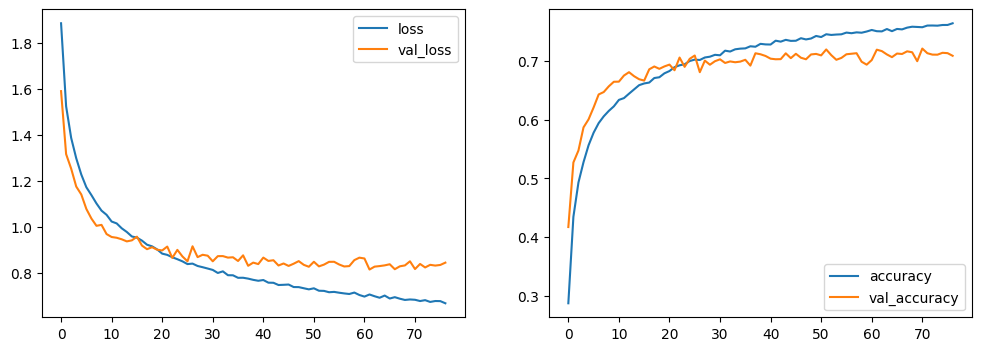

In [27]:
def plot_metrics(metrics):
    _, axes = plt.subplots(1, 2, figsize=(12, 4))
    metrics[['loss', 'val_loss']].plot(ax=axes[0])
    metrics[['accuracy', 'val_accuracy']].plot(ax=axes[1])

plot_metrics(metrics)
    

In [39]:
early_stopper = EarlyStopping(monitor='val_loss', mode="min",patience=5, restore_best_weights=True)

def evaluate_model(**kwargs):
    model = CNN_model(**kwargs)
    model.fit(
        scaled_X_train, 
        y_train, 
        epochs=20, 
        validation_split=1/6, 
        callbacks=[early_stopper]
        )
    metrics = pd.DataFrame(model.history.history)
    val_acc = metrics['val_accuracy'].iloc[-1]
    return val_acc

In [ ]:
dropout_accuracies = {}
for drop_rate in np.arange(0.1, 0.6, 0.1):
    dropout_accuracies[drop_rate] = evaluate_model(drop_rate=drop_rate)

/Users/asajad/Desktop/GithubForSchool/deep-machine-learning-asajad-hussein/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


TypeError: TensorFlowTrainer.fit() got an unexpected keyword argument 'workers'